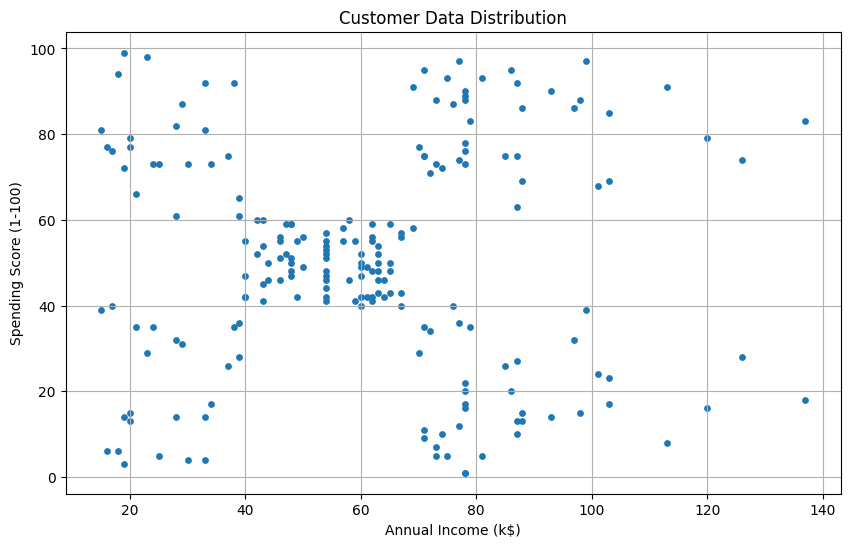

In [1]:
# 1. นำเข้าไลบรารี
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. โหลดข้อมูล
df = pd.read_csv('Mall_Customers.csv')

# 3. เลือกคุณลักษณะ
X = df.iloc[:, [3, 4]].values

# 4. พล็อตข้อมูลเบื้องต้น
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], s=15)
plt.title('Customer Data Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

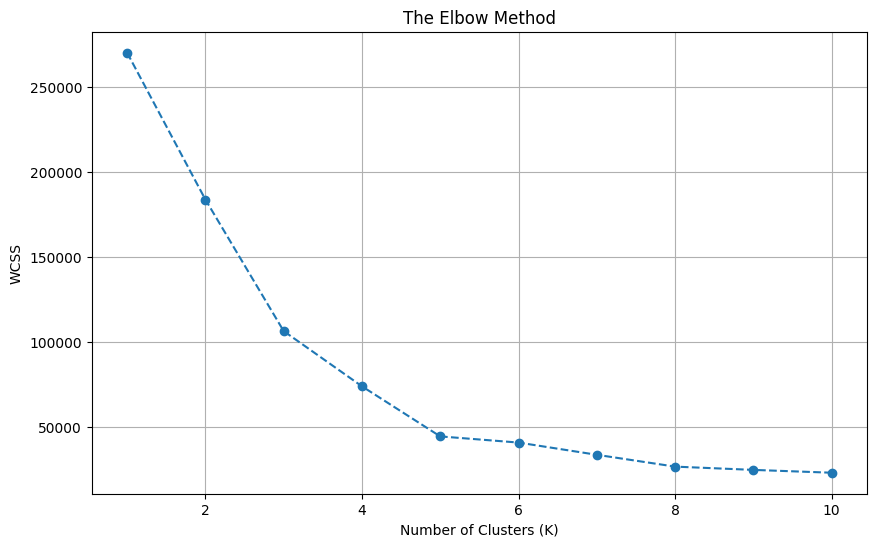

In [2]:
# --- เขียนโค้ดในส่วนนี้ ---
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# --- พล็อตกราฟ ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

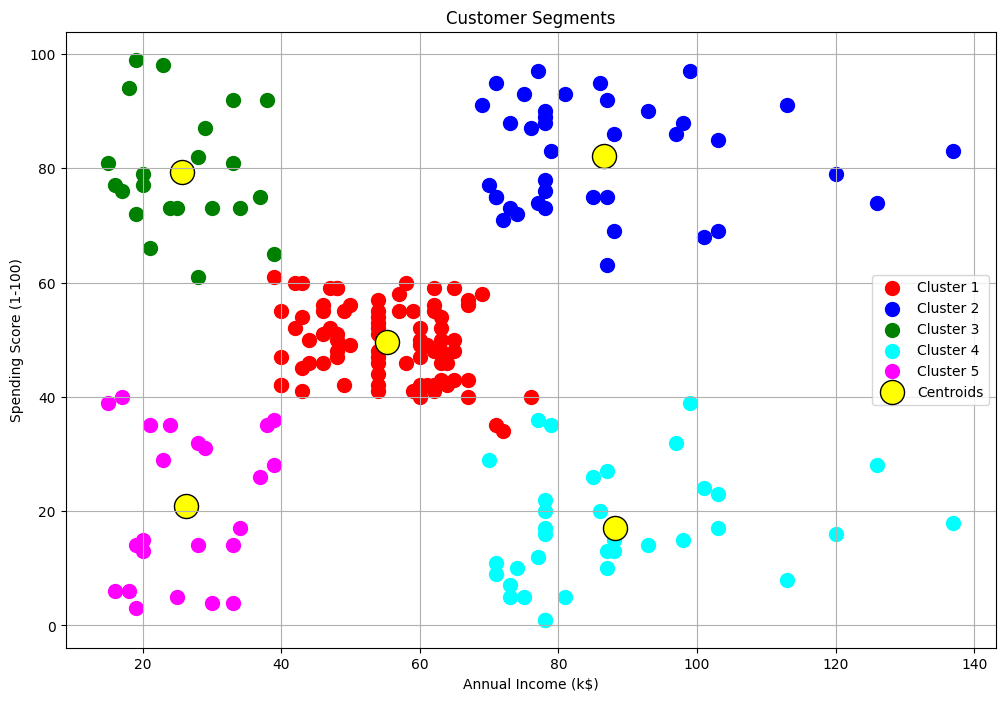

In [3]:
# 1. สร้างแบบจำลองด้วย K ที่เหมาะสม (เช่น K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# 2. ทำนายกลุ่ม
y_kmeans = kmeans.fit_predict(X)

# 3. & 4. แสดงผลลัพธ์เป็นกราฟ
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', edgecolor='black', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()